# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [51]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.metrics import recall_score, confusion_matrix, mean_squared_error, f1_score 
from sklearn import tree
import graphviz

#import pydotplus #si se quiere guardar el arbol de decisión en un archivo aparte para mejor visualización
#!pip install pydotplus

np.random.seed(0)  # Para mayor determinismo



## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [37]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# Normalizamos:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#dataset.columns
y_test.shape

(371,)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?

Se trata de automatizar el proceso de decisión para aprobar o no una línea de crédito hipotecario.

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
La variable objetivo a predecir es 'TARGET', la cual puede tomar solo dos valores (binaria), que indica si quien aplica deja de pagar eventualmente (TARGET=1) o si devuelve el préstamo(TARGET=0). 

3. ¿Qué información (atributos) hay disponible para hacer la predicción?

Hay 10 columnas:
        * LOAN: Monto de préstamo requerido
        * MORTDUE: Monto adeudado en la hipoteca existente
        * VALUE: Valor de la propiedad actual
        * YOJ: Años en el trabajo actual
        * DEROG: Número de informes principales despectivos 
        * DELINQ: Número de líneas de crédito morosas
        * CLAGE: Edad de la línea comercial más antigua en meses
        * NINQ: Número de líneas de crédito recientes
        * CLNO: Número de líneas de crédito
        * DEBTINC: Relación deuda/ingresos

4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?
Si bien todos los atributos parecen ser importantes, LOAN, VALUE, YOJ, DEROG y DEBTINC parecerían ser los mas determinantes.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


    * Accuracy: Se calcula la exactitud del conjunto de etiquetas predecidas *y_pred*, si coinciden exactamente con las etiquetas del conjunto *y_true*.
    * Precision: Sería la habilidad del clasificador para no etiquetar como positiva una muestra que es negativa. 
      Se calcula como la fracción: 
                                            precision = tp /(tp + fp) 
       
    * Recall: Se considera como la habilidad del clasificador en encontrar todas las etiquetas positivas. 
      Se calcula como la fracción: 
                                             recall= tp /(tp + fn) 
      
      siendo:
              tp: número de positivos verdaderos
              fp: número de falsos positivos
              fn: número de falsos negativos



     *F1: Se puede interpretar como el promedio entre *precision* y *recall*, las cuales contribuyen con igual peso. Se calcula como:
                             F1 = 2 * (precision * recall) / (precision + recall)

 
Tanto en *precision* como en *recall* y *F1*, el mejor valor sería 1 y el peor 0.     

Documentación: https://scikit-learn.org/stable/modules/model_evaluation.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [41]:
clf = SGDClassifier(random_state=5)
clf.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=5, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       313
           1       0.52      0.45      0.48        58

    accuracy                           0.85       371
   macro avg       0.71      0.69      0.70       371
weighted avg       0.84      0.85      0.84       371




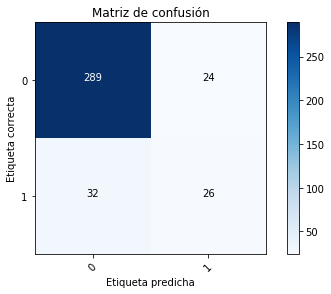

In [43]:
cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=('0', '1'), title="Matriz de confusión")

Podemos notar que el clasificador estándar tiene un buen grado de precisión, es decir, etiqueta bien la mayoría de los positivos verdaderos, pero no así a los falsos positivos o negativos. Incluso con estos inconvenientes, tiene una exactitud de un 85%.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [44]:
from sklearn.model_selection import GridSearchCV

# Exploración de hiperparámetros para función de coste "hinge"

Mejor conjunto de parámetros:
{'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'constant', 'penalty': 'l1'}

Puntajes de la grilla:

Exactitud: 0.835 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant', 'penalty': 'l1'}
Exactitud: 0.850 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant', 'penalty': 'l2'}
Exactitud: 0.849 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant', 'penalty': 'elasticnet'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant', 'penalty': 'l1'}
Exactitud: 0.853 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant', 'penalty': 'l2'}
Exactitud: 0.849 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant', 'penalty': 'elasticnet'}
Exactitud: 0.831 (+/-0.000) para los parámetros {'alp

/home/lucia/anaconda3/envs/p36workshop/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Exploración de hiperparámetros para función de coste "perceptron"

Mejor conjunto de parámetros:
{'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant', 'penalty': 'l1'}

Puntajes de la grilla:

Exactitud: 0.831 (+/-0.000) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant', 'penalty': 'l1'}
Exactitud: 0.751 (+/-0.010) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant', 'penalty': 'l2'}
Exactitud: 0.788 (+/-0.009) para los parámetros {'alpha': 0.1, 'eta0': 0.1, 'learning_rate': 'constant', 'penalty': 'elasticnet'}
Exactitud: 0.566 (+/-0.105) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant', 'penalty': 'l1'}
Exactitud: 0.794 (+/-0.001) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant', 'penalty': 'l2'}
Exactitud: 0.671 (+/-0.064) para los parámetros {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant', 'penalty': 'elasticnet'}
Exactitud: 0.699 (+/-0.070) para los parámetros {'a

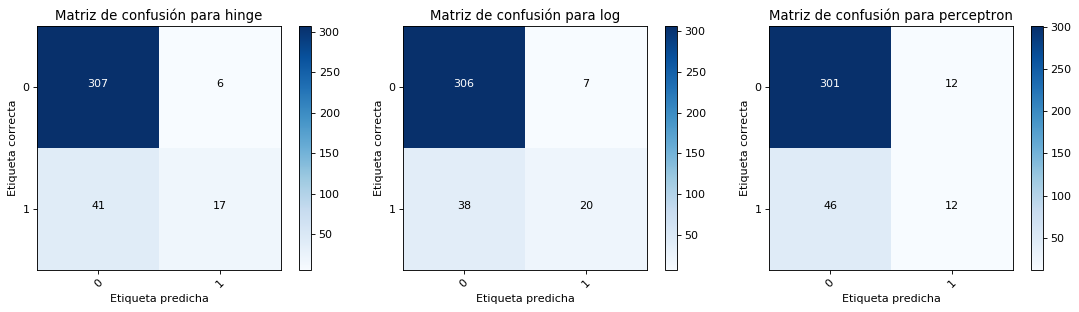

In [50]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    exploring_params = {
        'learning_rate': ['constant'],
        'eta0': [0.1, 0.01, 0.001],  # Tasa de entrenamiento
        'alpha': [0.1, 0.01, 0.001],  # Tasa de regularización
        'penalty':['l1','l2','elasticnet']
    }
    m = SGDClassifier(loss=loss, tol=1e-3,random_state=2)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    print("# Exploración de hiperparámetros para función de coste \"%s\"" % loss, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")
    
    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                              classes=('0', '1'), title="Matriz de confusión para %s" % loss)

   

El mejor conjunto de parámetros para la función de costo "hinge" y "log" fue:
    
        *'alpha': 0.001
        *'eta0': 0.01
mientras que para la función de costo: "perceptron", fueron un poco mayores:
        *'alpha': 0.1
        *'eta0': 0.1,

En todos, se conservó:
        *'learning_rate': 'constant'
        *'penalty': 'l1'

Pero todas tuvieron un reporte de clasificación muy similares:
    
   * "hinge": 

        precision    recall  f1-score   support

               0       0.88      0.98      0.93       313
               1       0.74      0.29      0.42        58

        accuracy                           0.87       371
       macro avg       0.81      0.64      0.67       371
    weighted avg       0.86      0.87      0.85       371

    * "log":

                  precision    recall  f1-score   support

               0       0.89      0.98      0.93       313
               1       0.74      0.34      0.47        58

        accuracy                           0.88       371
       macro avg       0.82      0.66      0.70       371
    weighted avg       0.87      0.88      0.86       371

    * "perceptron":

    
    Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

                  precision    recall  f1-score   support

               0       0.87      0.96      0.91       313
               1       0.50      0.21      0.29        58

        accuracy                           0.84       371
       macro avg       0.68      0.58      0.60       371
    weighted avg       0.81      0.84      0.82       371
    
  
 En comparación con los valores del clasificador lineal con hiperparámetros por defecto, vemos que no hay una gran mejoría en las métricas:
 
                precision    recall  f1-score   support

           0       0.90      0.92      0.91       313
           1       0.52      0.45      0.48        58

    accuracy                           0.85       371
    macro avg       0.71     0.69      0.70       371
    weighted avg    0.84     0.85      0.84       371




## Ejercicio 3: Árbol de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [52]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

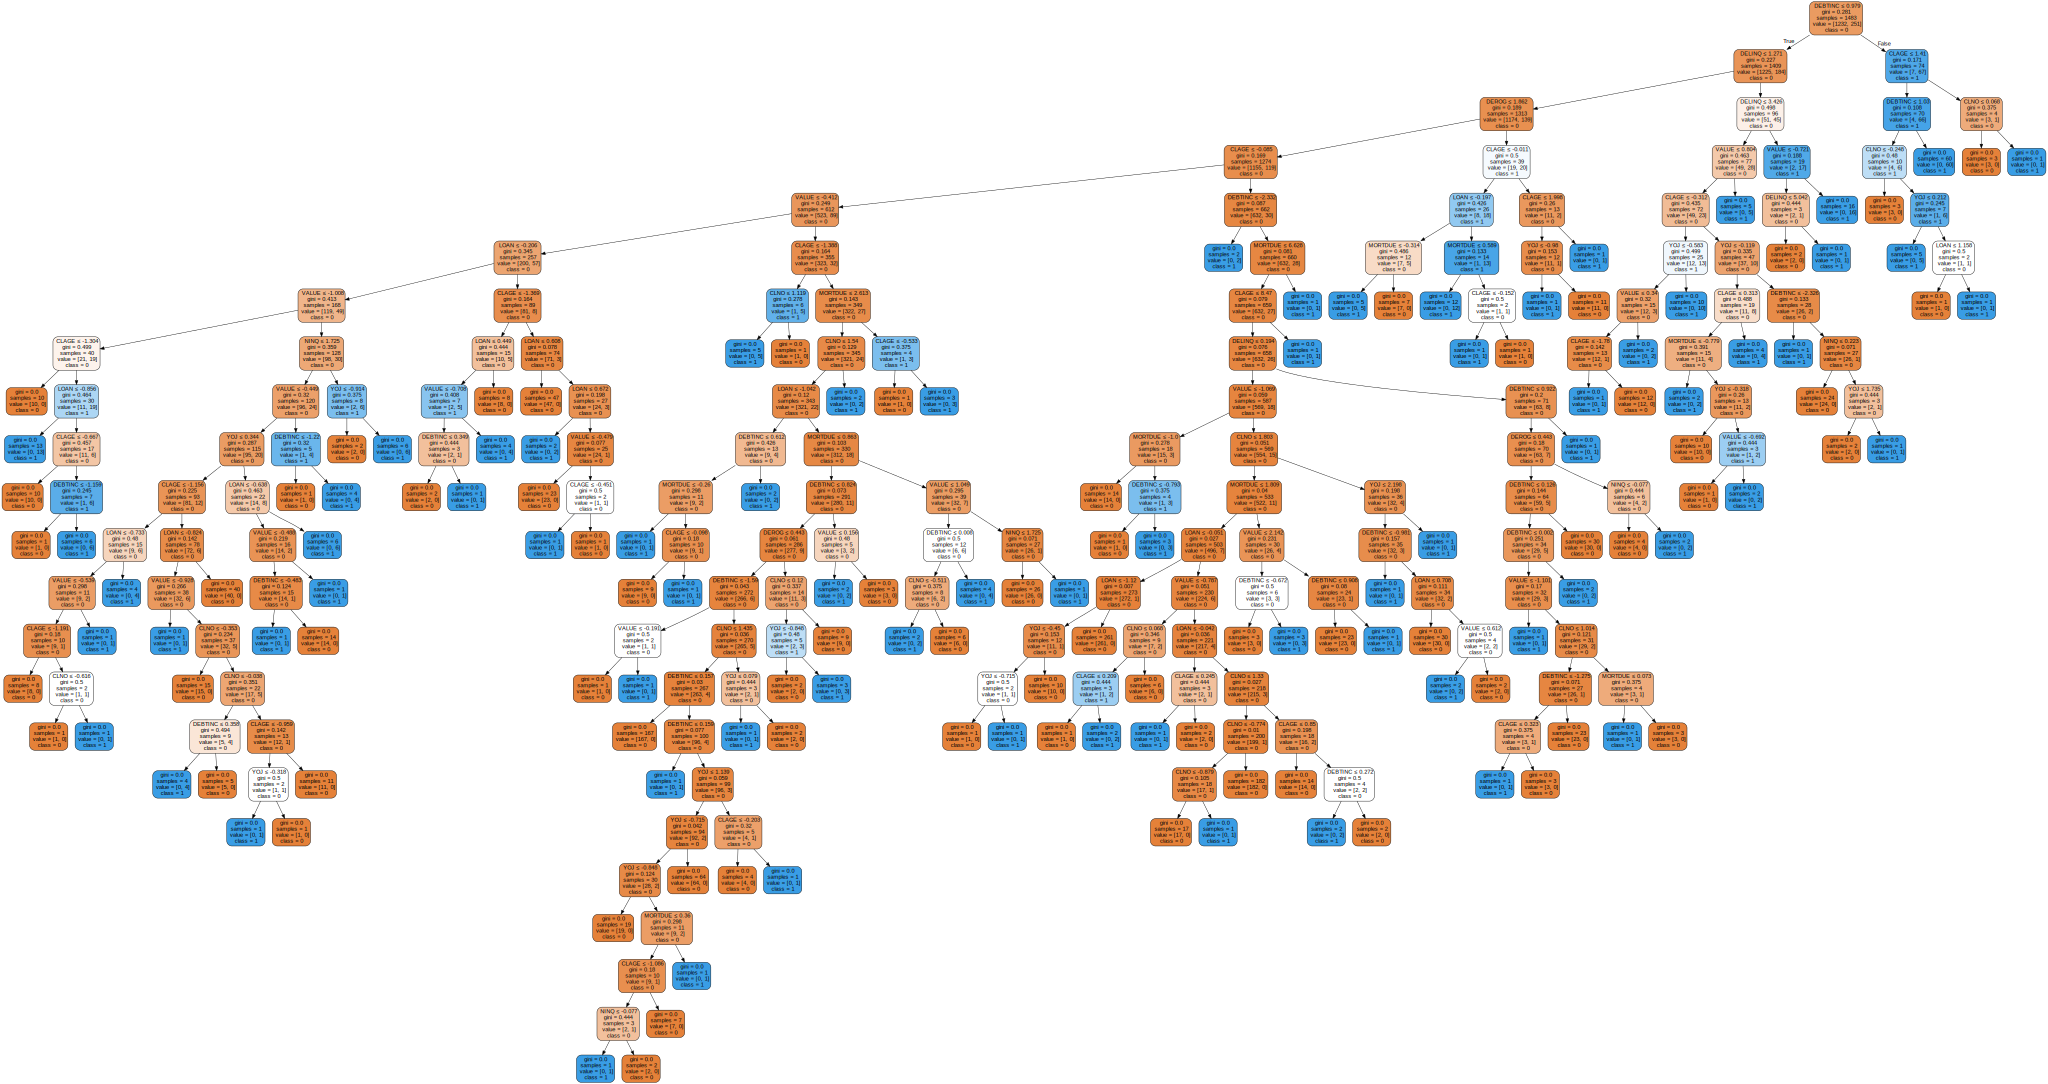

In [55]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=dataset.columns[1:],  
                         class_names=('0', '1'),  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph
#pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.write_png('original_tree.png')

In [56]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       313
           1       0.63      0.67      0.65        58

    accuracy                           0.89       371
   macro avg       0.78      0.80      0.79       371
weighted avg       0.89      0.89      0.89       371




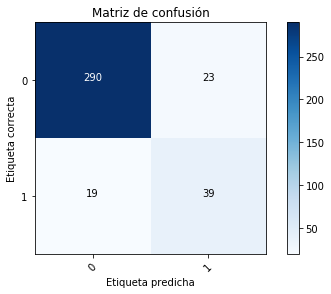

In [57]:
cnf_matrix = confusion_matrix(y_true, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=('0', '1'), title="Matriz de confusión")

Se puede notar que a comparación con el clasificador linear con hiperparámetros por defecto, el árbol de decisión con sus hiperparámetros por defecto, el árbol alcanza mejores métricas.

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Exploración de hiperparámetros para el criterio "gini"

Mejor conjunto de parámetros:
{'max_depth': 10, 'min_samples_leaf': 2}

Puntajes de la grilla:

Exactitud: 0.872 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 2}
Exactitud: 0.873 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 10}
Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 2, 'min_samples_leaf': 20}
Exactitud: 0.875 (+/-0.000) para los parámetros {'max_depth': 5, 'min_samples_leaf': 2}
Exactitud: 0.878 (+/-0.000) para los parámetros {'max_depth': 5, 'min_samples_leaf': 10}
Exactitud: 0.869 (+/-0.000) para los parámetros {'max_depth': 5, 'min_samples_leaf': 20}
Exactitud: 0.880 (+/-0.000) para los parámetros {'max_depth': 10, 'min_samples_leaf': 2}
Exactitud: 0.876 (+/-0.000) para los parámetros {'max_depth': 10, 'min_samples_leaf': 10}
Exactitud: 0.868 (+/-0.000) para los parámetros {'max_depth': 10, 'min_samples_leaf': 20}

Reporte de clasificación para el mejor clasi

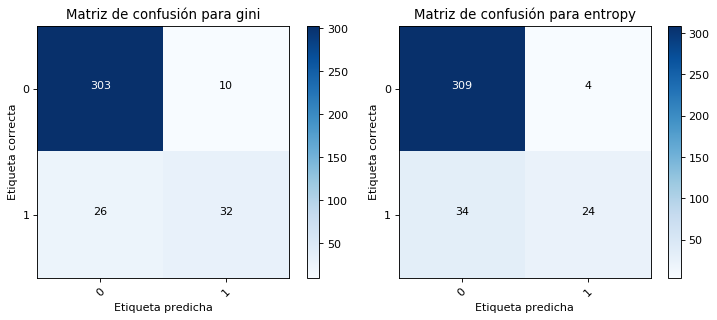

In [60]:
plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, criterion  in enumerate(('gini', 'entropy'), start=1):
    exploring_params = {
        'max_depth': [2, 5, 10],  # Tasa de regularización
        'min_samples_leaf':[2, 10, 20]
    }
    
    m = tree.DecisionTreeClassifier(criterion=criterion, random_state=0)
    model = GridSearchCV(m, exploring_params, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    
    
    print("# Exploración de hiperparámetros para el criterio \"%s\"" % criterion, end="\n\n")
    
    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")

    print("Puntajes de la grilla:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()

    print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred), end="\n\n")
    
    print("================================================", end="\n\n")

    plt.subplot(1, 3, idx)
    plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes=('0', '1'), title="Matriz de confusión para %s" % criterion)

Para el árbol de decisión variando sus hiperparámetros, se encuentra que para el criterio "gini", el mejor 
conjunto de parámetros son:
    'max_depth': 10 y 'min_samples_leaf': 2.
Mientras que para la función de coste "entropy", su mejor conjunto de parámetros resultan: 
    'max_depth': 5 y 'min_samples_leaf': 10.
            
Siendo las mejores métricas para el criterio "gini".


